In [5]:
import pandas as pd
import numpy as np
import umap
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
import umap.plot

In [4]:
df = pd.read_csv("../input/train_folds.csv")
df['path'] = df['id'].apply(lambda x: f'../input/train/{x[0]}/{x[1]}/{x[2]}/{x}.npy')

In [3]:
df.head(3)

,Unnamed: 0,id,target,file_path,fold,path
0,0,00000e74ad,1,input/train/0/0/0/00000e74ad.npy,2,../input/train/0/0/0/00000e74ad.npy
1,1,00001f4945,0,input/train/0/0/0/00001f4945.npy,1,../input/train/0/0/0/00001f4945.npy
2,2,0000661522,0,input/train/0/0/0/0000661522.npy,3,../input/train/0/0/0/0000661522.npy


In [6]:
X_0 = []
X_1 = []
X_2 = []
t = []

for _, d in tqdm(df.iterrows()):
    a = np.load(d.path)
    X_0.append(a[0])
    X_1.append(a[1])
    X_2.append(a[2])
    t.append(d.target)

560000it [03:50, 2429.76it/s]


KeyboardInterrupt: 

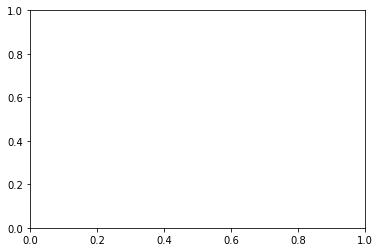

In [14]:
plt.hist(X_0)

In [11]:
X_2 = np.array(X_2)

In [12]:
X_2.max()

1.1161063663761836e-20

In [5]:
df_sub = df.sample(10000)

In [8]:
np.load("../input/train/0/0/0/00000e74ad.npy")

array([[-5.94830548e-21, -5.84995448e-21, -5.42415169e-21, ...,
        -6.06698987e-21, -5.96345722e-21, -5.75778438e-21],
       [ 9.75407048e-22,  4.52586118e-22,  4.58643893e-23, ...,
        -1.09608208e-20, -1.09766636e-20, -1.10858129e-20],
       [-1.74871983e-21, -1.18286791e-21, -1.93223777e-21, ...,
         1.46502268e-21,  2.18644864e-21,  1.54085934e-21]])

In [38]:
mapper = umap.UMAP(n_neighbors=200, min_dist=0, n_components=2).fit(X_0)

<AxesSubplot:>

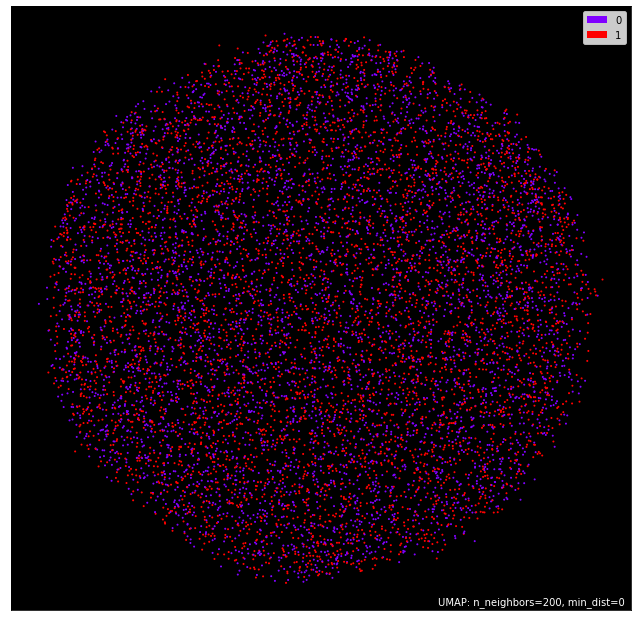

In [39]:
umap.plot.points(mapper, labels=np.array(t), theme='fire')

In [43]:
from nnAudio.Spectrogram import CQT1992v2
import torch

In [41]:
wave_transform = CQT1992v2(sr=2048, fmin=20, fmax=1024, hop_length=16)

CQT kernels created, time used = 0.0483 seconds


/home/hamsh/anaconda3/envs/rapids-v4/lib/python3.8/site-packages/nnAudio/utils.py:326: SyntaxWarning: If fmax is given, n_bins will be ignored
  warnings.warn('If fmax is given, n_bins will be ignored',SyntaxWarning)


In [47]:
s = np.load("../input/train/0/0/0/00000e74ad.npy")

tfm_0 = wave_transform(torch.from_numpy(s[0]).float())
tfm_1 = wave_transform(torch.from_numpy(s[1]).float())
tfm_2 = wave_transform(torch.from_numpy(s[2]).float())

In [53]:
tfm = np.vstack([tfm_0, tfm_1, tfm_2])
tfm.shape

(3, 69, 257)

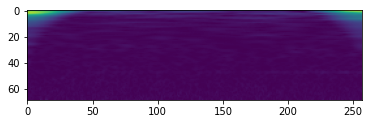

In [81]:
plt.imshow(tfm[0])

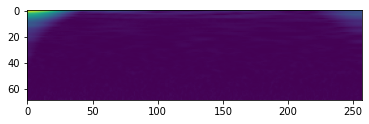

In [82]:
plt.imshow(tfm[1])

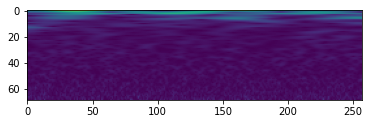

In [83]:
plt.imshow(tfm[2])

In [67]:
import timm
import torch.nn as nn

In [79]:
model = timm.create_model("deit_base_distilled_patch16_384", pretrained=True, img_size=(69, 257))
n_features = model.head.in_features
model.head = nn.Linear(n_features, 1)

In [76]:
torch.from_numpy(tfm).unsqueeze(0).shape

torch.Size([1, 3, 69, 257])

In [80]:
model(torch.from_numpy(tfm).unsqueeze(0))

(tensor([[-0.2335]], grad_fn=<AddmmBackward>),
 tensor([[-7.3440e-01,  4.0272e-01,  3.3496e-01,  1.5205e+00,  3.3424e+00,
           1.7976e+00,  4.8701e-02, -4.5044e-01, -2.2141e+00,  8.5528e-01,
           1.5958e+00, -1.6054e-01,  8.6042e-01,  2.0614e-01, -2.9558e-02,
          -4.3689e-01,  8.1069e-01, -1.8287e+00,  2.4519e-03,  1.4132e-01,
           6.3815e-01,  5.5908e+00,  1.3770e+00,  1.9966e+00, -1.4684e+00,
          -1.1914e+00,  7.9166e-01, -1.3341e+00, -1.4637e+00,  5.3650e-01,
          -2.0833e+00, -2.8340e-01, -2.5701e-01, -4.5132e-01,  1.4544e+00,
          -1.0168e+00, -1.5039e+00, -2.4491e+00,  6.6632e-01, -1.9550e+00,
          -9.2253e-01, -8.1007e-01,  1.2197e+00, -1.3447e+00, -2.1859e+00,
          -8.8987e-01, -7.5809e-01,  3.2042e-01, -1.2141e+00, -1.4520e+00,
          -1.3513e+00, -2.2550e-01,  1.5694e+00,  1.0899e+00, -6.4163e-01,
          -2.2529e+00, -1.9194e+00, -2.5825e+00,  1.0671e+00,  2.7727e+00,
           7.9165e-01, -1.2650e+00,  8.4805e-02,  7.4

In [2]:
import timm
timm.list_models(pretrained=True)

['adv_inception_v3',
 'cait_m36_384',
 'cait_m48_448',
 'cait_s24_224',
 'cait_s24_384',
 'cait_s36_384',
 'cait_xs24_384',
 'cait_xxs24_224',
 'cait_xxs24_384',
 'cait_xxs36_224',
 'cait_xxs36_384',
 'coat_lite_mini',
 'coat_lite_small',
 'coat_lite_tiny',
 'coat_mini',
 'coat_tiny',
 'convit_base',
 'convit_small',
 'convit_tiny',
 'cspdarknet53',
 'cspresnet50',
 'cspresnext50',
 'deit_base_distilled_patch16_224',
 'deit_base_distilled_patch16_384',
 'deit_base_patch16_224',
 'deit_base_patch16_384',
 'deit_small_distilled_patch16_224',
 'deit_small_patch16_224',
 'deit_tiny_distilled_patch16_224',
 'deit_tiny_patch16_224',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'densenetblur121d',
 'dla34',
 'dla46_c',
 'dla46x_c',
 'dla60',
 'dla60_res2net',
 'dla60_res2next',
 'dla60x',
 'dla60x_c',
 'dla102',
 'dla102x',
 'dla102x2',
 'dla169',
 'dm_nfnet_f0',
 'dm_nfnet_f1',
 'dm_nfnet_f2',
 'dm_nfnet_f3',
 'dm_nfnet_f4',
 'dm_nfnet_f5',
 'dm_nfnet_f6',
 'dpn68',
 'dpn